In [53]:
import pandas  as pd
import matplotlib.pyplot as plt
data=pd.read_csv('Mall_Customers.csv')
data


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [16]:
data.shape

(200, 5)

In [34]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [54]:
x=data.iloc[:,[3,4]].values
# x=data.iloc[:30,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

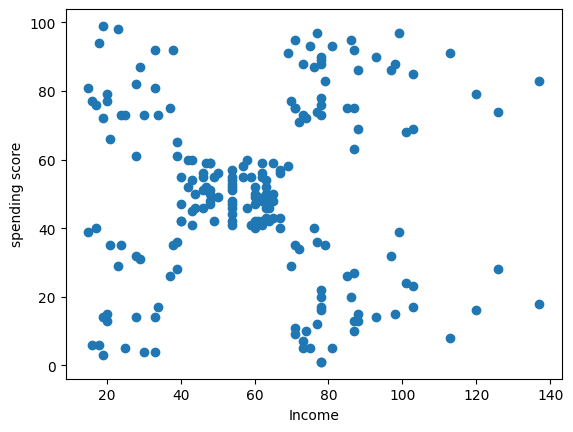

In [36]:
plt.scatter(x[...,0], x[...,1])
plt.xlabel('Income')
plt.ylabel('spending score')
plt.show()

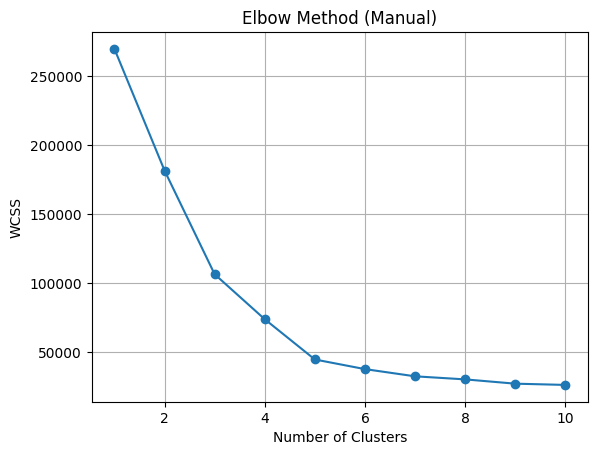

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_dist(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def compute_wcss(points, centroids, labels):
    wcss = 0
    for i, point in enumerate(points):
        centroid = centroids[labels[i]]
        wcss += euclidean_dist(point, centroid) ** 2
    return wcss

def manual_kmeans(X, k, max_iter=100):
    # Step 1: Randomly choose k initial centroids
    np.random.seed(0)
    indices = np.random.choice(len(X), k, replace=False)
    centroids = X[indices]

    for _ in range(max_iter):
        # Step 2: Assign each point to the nearest centroid
        labels = np.array([
            np.argmin([euclidean_dist(x, c) for c in centroids]) for x in X
        ])
        
        # Step 3: Recalculate centroids
        new_centroids = np.array([
            X[labels == i].mean(axis=0) if len(X[labels == i]) > 0 else centroids[i]
            for i in range(k)
        ])
        
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, labels

# Run manual KMeans for 1 to 10 clusters and compute WCSS
wcss = []
for k in range(1, 11):
    centroids, labels = manual_kmeans(x, k)
    wcss.append(compute_wcss(x, centroids, labels))

# Plot Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method (Manual)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [55]:
import numpy as np

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manual_kmeans(x, k, max_iter=100, random_state=22):
    np.random.seed(random_state)
    # Step 1: Randomly choose k initial centroids from data
    indices = np.random.choice(len(x), k, replace=False)
    centroids = x[indices]

    for _ in range(max_iter):
        # Step 2: Assign each point to the nearest centroid
        labels = np.array([
            np.argmin([euclidean_distance(point, centroid) for centroid in centroids])
            for point in x
        ])

        # Step 3: Recalculate centroids
        new_centroids = np.array([
            x[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i]
            for i in range(k)
        ])

        # Step 4: Check for convergence
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# Example usage
# x = your input numpy array (e.g., x = data.values)
labels, centroids = manual_kmeans(x, k=5, random_state=22)

print(labels)


[2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 3 2 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 4 0 4 3 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 3 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4]


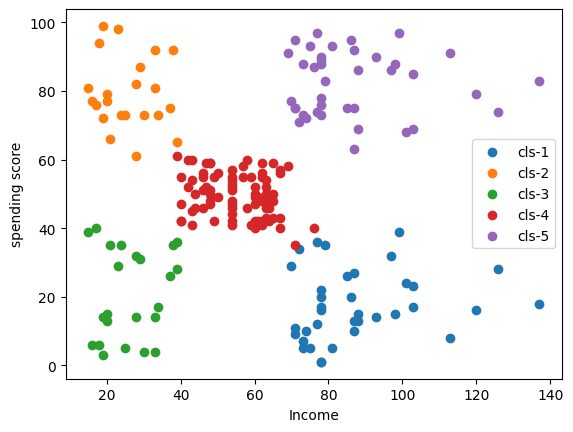

In [22]:
plt.scatter(x[labels==0,0], x[labels==0,1], label='cls-1')
plt.scatter(x[labels==1,0],x[labels ==1,1], label='cls-2')
plt.scatter(x[labels==2,0], x[labels==2,1], label='cls-3')
plt.scatter(x[labels==3,0],x[labels ==3,1], label='cls-4')
plt.scatter(x[labels==4,0], x[labels==4,1], label='cls-5')
plt.xlabel('Income')
plt.ylabel('spending score')
plt.legend()
plt.show()

In [23]:
data['target']=labels

data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),target
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,0
197,198,Male,32,126,74,4
198,199,Male,32,137,18,0


Naive Bayes Results:
Accuracy: 0.55, Precision: 1.00, Recall: 0.55, F1 Score: 0.71


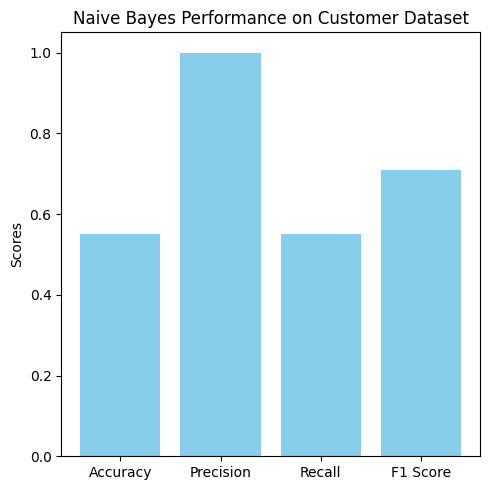

In [32]:

import numpy as np
import matplotlib.pyplot as plt


# Step 2: Feature and target selection
features = ['Annual Income (k$)', 'Spending Score (1-100)']
x = data[features].values
y = data['target'].values

# Step 3: Train-test split (80-20)
split = int(0.8 * len(data))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

# Step 4: Manual Naive Bayes (Gaussian)
def gaussian_prob(x, mean, std):
    eps = 1e-6
    return (1.0 / (np.sqrt(2 * np.pi) * (std + eps))) * np.exp(- ((x - mean) ** 2) / (2 * (std + eps) ** 2))

def naive_bayes_predict(x_train, y_train, x_test):
    labels = np.unique(y_train)
    means = {}
    stds = {}
    priors = {}

    for label in labels:
        x_l = x_train[y_train == label]
        means[label] = x_l.mean(axis=0)
        stds[label] = x_l.std(axis=0)
        priors[label] = len(x_l) / len(x_train)

    predictions = []
    for x in x_test:
        probs = {}
        for label in labels:
            prob = np.log(priors[label])
            for i in range(len(x)):
                prob += np.log(gaussian_prob(x[i], means[label][i], stds[label][i]))
            probs[label] = prob
        predicted = max(probs, key=probs.get)
        predictions.append(predicted)
    return predictions

y_pred_nb = naive_bayes_predict(x_train, y_train, x_test)

# Step 5: Metrics Calculation
def evaluate(y_true, y_pred):
    accuracy = sum(y1 == y2 for y1, y2 in zip(y_true, y_pred)) / len(y_true)
    precision_list, recall_list, f1_list = [], [], []
    labels = np.unique(y_true)

    for label in labels:
        TP = sum((y_true[i] == label and y_pred[i] == label) for i in range(len(y_true)))
        FP = sum((y_true[i] != label and y_pred[i] == label) for i in range(len(y_true)))
        FN = sum((y_true[i] == label and y_pred[i] != label) for i in range(len(y_true)))
        precision = TP / (TP + FP + 1e-6)
        recall = TP / (TP + FN + 1e-6)
        f1 = 2 * precision * recall / (precision + recall + 1e-6)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

    precision = np.mean(precision_list)
    recall = np.mean(recall_list)
    f1 = np.mean(f1_list)
    return accuracy, precision, recall, f1

# Step 6: Evaluate Naive Bayes
acc_nb, pre_nb, rec_nb, f1_nb = evaluate(y_test, y_pred_nb)

# Step 7: Print results
print("Naive Bayes Results:")
print(f"Accuracy: {acc_nb:.2f}, Precision: {pre_nb:.2f}, Recall: {rec_nb:.2f}, F1 Score: {f1_nb:.2f}")

# Step 8: Visualization
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
nb_scores = [acc_nb, pre_nb, rec_nb, f1_nb]

plt.figure(figsize=(5, 5))
plt.bar(labels, nb_scores, color='skyblue')
plt.ylabel('Scores')
plt.title('Naive Bayes Performance on Customer Dataset')
plt.tight_layout()
plt.show()


In [72]:
# kmeadian
import numpy as np

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def manual_kmedians(x, k, max_iter=100, random_state=22):
    np.random.seed(random_state)
    # Step 1: Randomly choose k initial centroids from data
    indices = np.random.choice(len(x), k, replace=False)
    centroids = x[indices]

    for _ in range(max_iter):
        # Step 2: Assign each point to the nearest centroid using Manhattan distance
        labels = np.array([
            np.argmin([manhattan_distance(point, centroid) for centroid in centroids])
            for point in x
        ])

        # Step 3: Recalculate centroids using the median
        new_centroids = np.array([
            np.median(x[labels == i], axis=0) if np.any(labels == i) else centroids[i]
            for i in range(k)
        ])

        # Step 4: Check for convergence
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# Example usage
# x = your input numpy array (e.g., x = data.values)
labels, centroids = manual_kmedians(x, k=5, random_state=22)

print(labels)


[2 1 2 1 2 1 2 4 2 1 2 4 2 1 2 1 2 3 2 4 2 1 2 1 2 1 2 3 2 4 2 1 2 4 2 1 2
 1 2 1 3 4 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 1 4 0 1 0 4 0 1 0 1 0 1 0 4 0 1 0 1 0 4 0 4 0 4 0 1
 0 4 0 4 0 1 0 4 0 1 0 1 0 4 0 4 0 1 0 4 0 1 0 1 0 4 0 4 0 1 0 4 0 4 0 4 0
 4 0 1 0 4 0 1 0 4 0 1 0 1 0 4]


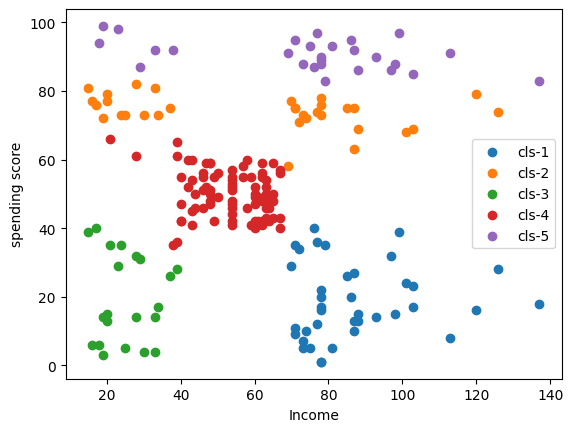

In [ ]:
plt.scatter(x[labels==0,0], x[labels==0,1], label='cls-1')
plt.scatter(x[labels==1,0],x[labels ==1,1], label='cls-2')
plt.scatter(x[labels==2,0], x[labels==2,1], label='cls-3')
plt.scatter(x[labels==3,0],x[labels ==3,1], label='cls-4')
plt.scatter(x[labels==4,0], x[labels==4,1], label='cls-5')
plt.xlabel('Income')
plt.ylabel('spending score')
plt.legend()
plt.show()

In [ ]:
# agglomerative - use where datapoints are complex
'''it can handle the outliers if present - complete linkage
single linkage can apply if cluster are separated '''


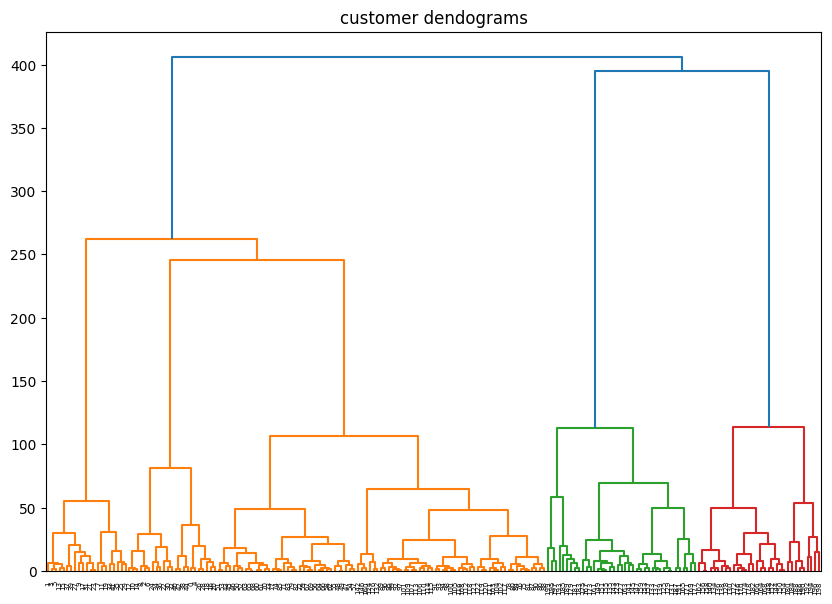

In [51]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("customer dendograms")
dend=shc.dendrogram(shc.linkage(x , method ='ward'))

In [70]:
import numpy as np

# Euclidean distance
def euclidean(a, b):
    return np.sqrt(np.sum((a - b)**2))

# Ward linkage distance
def ward_distance(cluster1, cluster2):
    n1, n2 = len(cluster1), len(cluster2)
    centroid1 = np.mean(cluster1, axis=0)
    centroid2 = np.mean(cluster2, axis=0)
    return (n1 * n2) / (n1 + n2) * np.sum((centroid1 - centroid2) ** 2)

def ward_agglomerative(X, n_clusters=0):
    # Step 1: Start with each point as its own cluster
    clusters = [[x] for x in X]

    while len(clusters) > n_clusters:
        min_dist = float('inf')
        pair_to_merge = (0, 1)

        # Step 2: Find the pair with minimum Ward distance
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = ward_distance(clusters[i], clusters[j])
                if dist < min_dist:
                    min_dist = dist
                    pair_to_merge = (i, j)

        # Step 3: Merge clusters
        i, j = pair_to_merge
        new_cluster = clusters[i] + clusters[j]
        clusters.pop(j)
        clusters.pop(i)
        clusters.append(new_cluster)

    # Step 4: Assign labels
    labels = np.zeros(len(X), dtype=int)
    for cluster_idx, cluster in enumerate(clusters):
        for point in cluster:
            idx = np.where((X == point).all(axis=1))[0][0]
            labels[idx] = cluster_idx

    return labels
labels

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3,
       2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 0, 4, 3, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4], dtype=int64)

In [76]:
import numpy as np

def euclidean_dist(a, b):
    return np.linalg.norm(a - b)

def region_query(x, point_idx, eps):
    neighbors = []
    for i in range(len(x)):
        if euclidean_dist(x[point_idx], x[i]) <= eps:
            neighbors.append(i)
    return neighbors

def expand_cluster(x, labels, point_idx, cluster_id, eps, min_samples):
    neighbors = region_query(x, point_idx, eps)
    if len(neighbors) < min_samples:
        labels[point_idx] = -1  # mark as noise
        return False
    else:
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]
            if labels[neighbor_idx] == 0:  # unvisited
                labels[neighbor_idx] = cluster_id
                neighbor_neighbors = region_query(x, neighbor_idx, eps)
                if len(neighbor_neighbors) >= min_samples:
                    for n in neighbor_neighbors:
                        if n not in neighbors:
                            neighbors.append(n)
            elif labels[neighbor_idx] == -1:
                labels[neighbor_idx] = cluster_id  # change noise to border point
            i += 1
        return True

def dbscan_manual(x, eps, min_samples):
    labels = np.zeros(len(x), dtype=int)  # 0 means unvisited
    cluster_id = 0

    for point_idx in range(len(x)):
        if labels[point_idx] != 0:
            continue
        if expand_cluster(x, labels, point_idx, cluster_id + 1, eps, min_samples):
            cluster_id += 1
    return labels
labels = dbscan_manual(x, eps=20, min_samples=20)
print(labels)


[ 1  1 -1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1 -1 -1 -1 -1 -1 -1 -1]


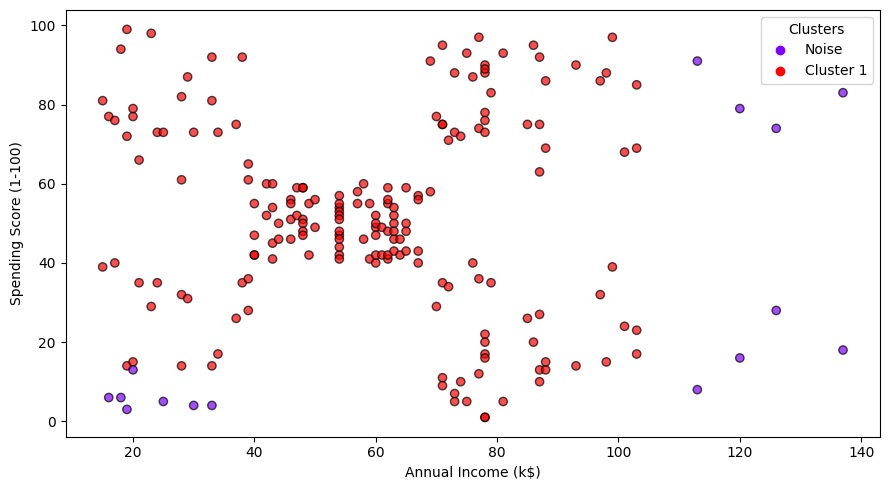

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# x[:, 0] → Annual Income
# x[:, 1] → Spending Score
# labels → predicted clusters or class labels

plt.figure(figsize=(9, 5))
scatter = plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='k')

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
# plt.title("Customer Segmentation")

# Optional: Label 'minority' class as 'Noise'
# Replace `minority_class_label` with the actual value (e.g., -1 if it's from DBSCAN or a rare class)
minority_class_label = -1  # update this based on your data
unique_labels = np.unique(labels)

# Create a legend with label names
legend_labels = []
for ul in unique_labels:
    label_name = "Noise" if ul == minority_class_label else f"Cluster {ul}"
    legend_labels.append(label_name)

# Create legend
handles = [plt.Line2D([], [], marker='o', linestyle='', color=scatter.cmap(scatter.norm(i)))
           for i in unique_labels]
plt.legend(handles, legend_labels, title="Clusters", loc="best")

plt.tight_layout()
plt.show()
